In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
import pgeocode
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats
from pandas.api.types import CategoricalDtype


from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from googletrans import Translator

from sklearn.preprocessing import StandardScaler

# London:

In [2]:
London = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/london_merged.csv',encoding='utf8',engine='python')

"timestamp" - timestamp field for grouping the data  
"cnt" - the count of a new bike shares  
"t1" - real temperature in C  
"t2" - temperature in C "feels like"  
"hum" - humidity in percentage  
"wind_speed" - wind speed in km/h  
"weather_code" - category of the weather  
"is_holiday" - boolean field - 1 holiday / 0 non holiday  
"is_weekend" - boolean field - 1 if the day is weekend  
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.  

"weathe_code" category description:   
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity  
2 = scattered clouds / few clouds  
3 = Broken clouds  
4 = Cloudy  
7 = Rain/ light Rain shower/ Light rain  
10 = rain with thunderstorm  
26 = snowfall  
94 = Freezing Fog  

In [3]:
London.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
London.sort_values(by='timestamp', inplace=True)
# London.isnull().sum()

In [5]:
London.timestamp.dtypes

dtype('O')

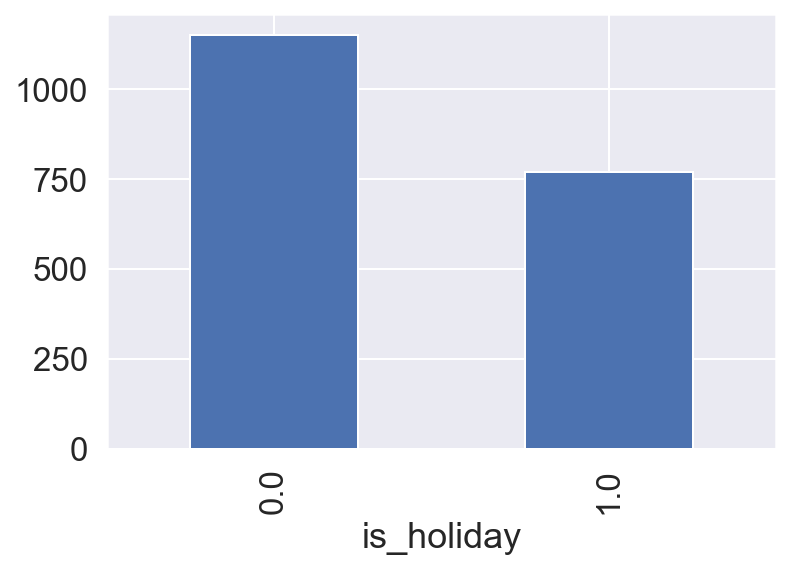

In [6]:
London.groupby('is_holiday')['cnt'].mean().plot(kind='bar');

In [7]:
London['timestamp'] = pd.to_datetime(London.timestamp)

In [8]:
London.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
London['Day'] = London.timestamp.dt.weekday_name
London.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Sunday


In [10]:
meadian_hum = London.hum.median()
list_hum_binary = []
for i in London['hum']:
    if i > meadian_hum:
        list_hum_binary.append(1)
    else:
        list_hum_binary.append(0)
London['hum_binary'] =  list_hum_binary

In [11]:
sum_london_hum = London.groupby(['Day','hum_binary']).sum()
count_london_hum = London.groupby(['Day','hum_binary']).count()
aver_hum_london = sum_london_hum/count_london_hum

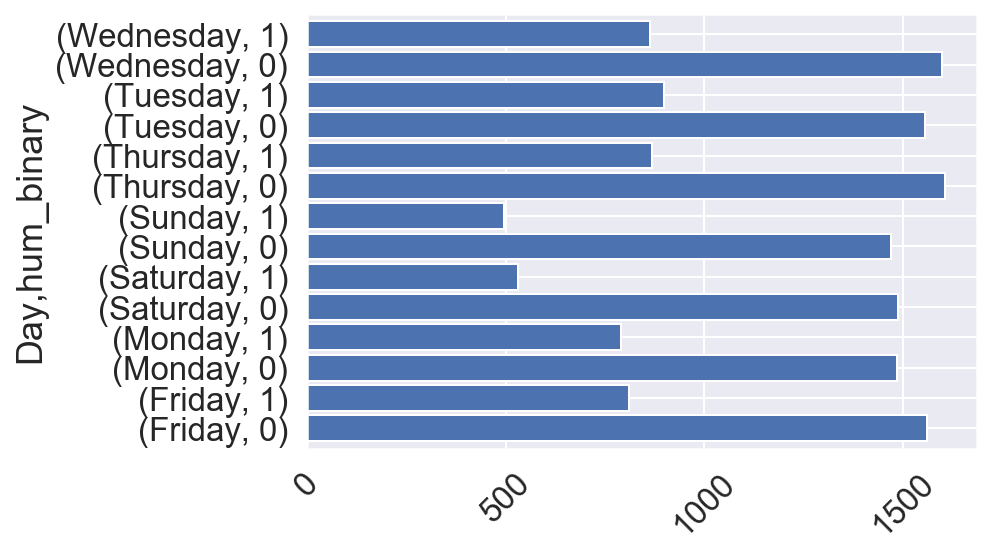

In [12]:
aver_hum_london.cnt.plot(
    kind='barh', width=0.85)
plt.xticks(rotation=45)
plt.show()
# edw vlepoume oti to humidity otan einai megalo (panw apo to median =1) epireazei to soukou
# pou oi anthrwpoi exoun tin epologi
#enw otan einai mikrotero tou median (=0) oxi

In [13]:
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
London['Day'] = London['Day'].astype(CategoricalDtype(categories=days_of_the_week, ordered=True))

Text(0, 0.5, 'Counts')

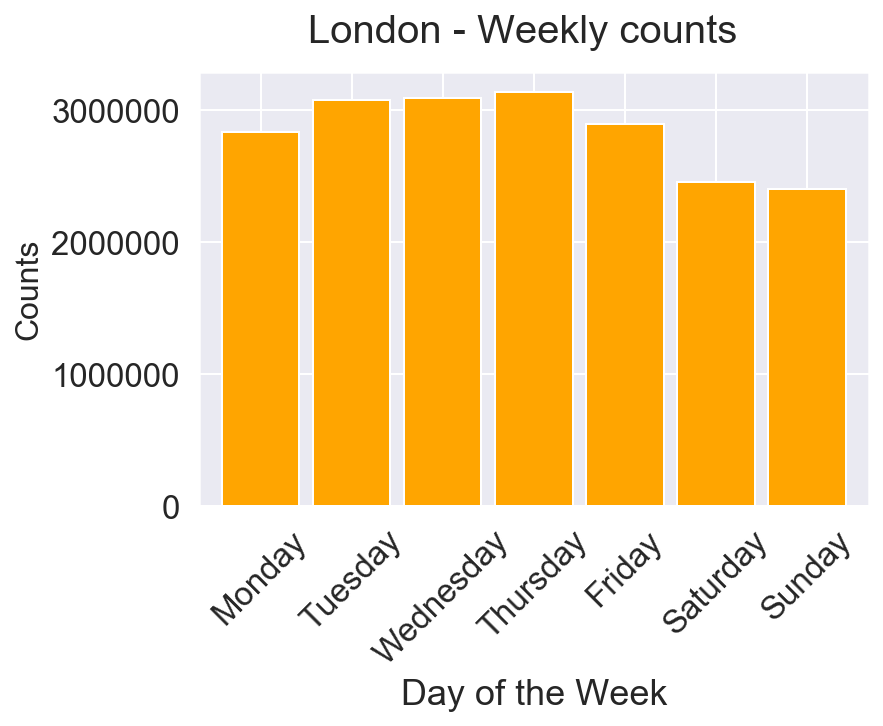

In [14]:

fig = plt.figure()
London.groupby('Day')['cnt'].sum().plot(
    kind='bar', color='orange', width=0.85)
fig.suptitle('London - Weekly counts', fontsize=20)
plt.xlabel('Day of the Week', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Counts', fontsize=16)

In [15]:
London.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hum_binary
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,-0.365183
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.333165
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.299896
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.806251
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.263472
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,0.286820
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.032221
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.024559
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.217195
hum_binary,-0.365183,-0.333165,-0.299896,0.806251,-0.263472,0.286820,0.032221,0.024559,0.217195,1.000000


In [16]:
London.timestamp.max() , London.timestamp.min()

(Timestamp('2017-01-03 23:00:00'), Timestamp('2015-01-04 00:00:00'))

In [17]:
London.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'Day', 'hum_binary'],
      dtype='object')

# DC:

In [18]:
DC_dataset = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/bike-sharing-dataset/day.csv')

In [19]:
DC_dataset.shape

(731, 16)

In [20]:
DC_dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
# DC_dataset.isnull().sum()
# den exei nulls
DC_dataset.drop(columns=['instant'], inplace=True)

In [22]:
DC_dataset.rename(columns={'dteday': 'date'}, inplace=True)

In [23]:
DC_dataset.date.unique()

DC_dataset.date.max(), DC_dataset.date.min()

('2012-12-31', '2011-01-01')

In [24]:
DC_dataset.yr.value_counts()
# DC_dataset.yr.unique()

1    366
0    365
Name: yr, dtype: int64

In [25]:
DC_dataset.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
DC_dataset.shape

(731, 15)

# ============================================================

In [27]:
DC = pd.read_csv('/Users/vilvaki/Desktop/GA/bikes/bike-sharing-demand/train.csv')

In [28]:
DC.shape

(10886, 12)

In [29]:
DC.datetime.unique()

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [30]:
DC.datetime.max() , DC.datetime.min()

('2012-12-19 23:00:00', '2011-01-01 00:00:00')

In [31]:
DC.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
DC.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [33]:
median_hum_dc = DC.humidity.median()
list_hum_binary_dc = []
for i in DC['humidity']:
    if i > median_hum_dc:
        list_hum_binary_dc.append(1)
    else:
        list_hum_binary_dc.append(0)
DC['hum_binary'] =  list_hum_binary_dc

In [34]:
DC['datetime'] = pd.to_datetime(DC.datetime)
DC.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hum_binary             int64
dtype: object

In [41]:
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DC['Day'] = DC['Day'].astype(CategoricalDtype(categories=days_of_the_week, ordered=True))

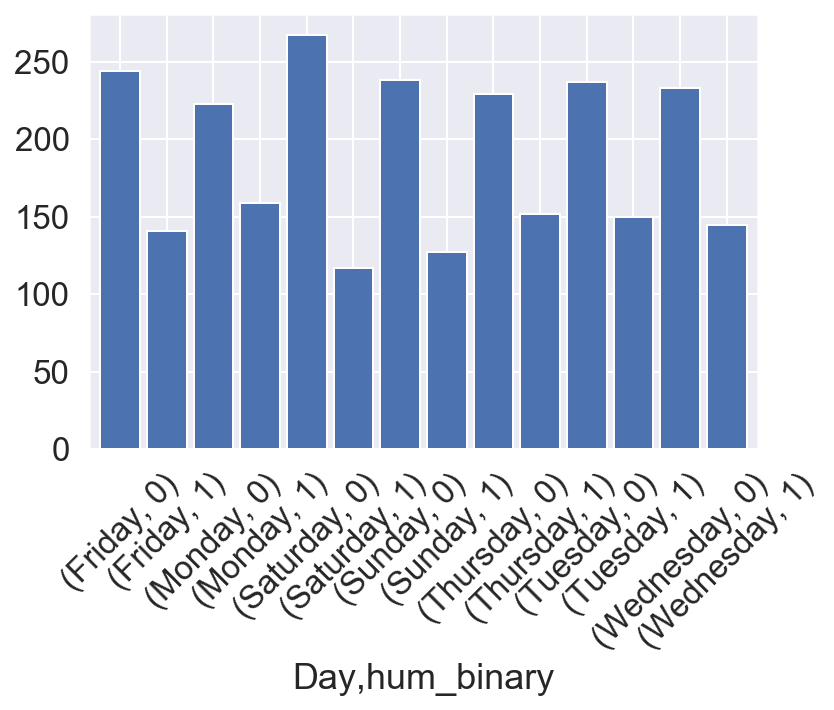

In [42]:
DC['Day'] = DC.datetime.dt.weekday_name
aver_hum_dc = DC.groupby(['Day','hum_binary']).sum()/DC.groupby(['Day','hum_binary']).count()
aver_hum_dc['count'].plot(
    kind='bar', width=0.85)
plt.xticks(rotation=45)
plt.show()

In [43]:
DC.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hum_binary', 'Day'],
      dtype='object')

In [44]:
DC.datetime.dtypes

dtype('<M8[ns]')

In [45]:
DC.datetime.max() , DC.datetime.min()

(Timestamp('2012-12-19 23:00:00'), Timestamp('2011-01-01 00:00:00'))

In [47]:
DC['Day'] = DC['Day'].astype(CategoricalDtype(categories=days_of_the_week, ordered=True))

Text(0, 0.5, 'Counts')

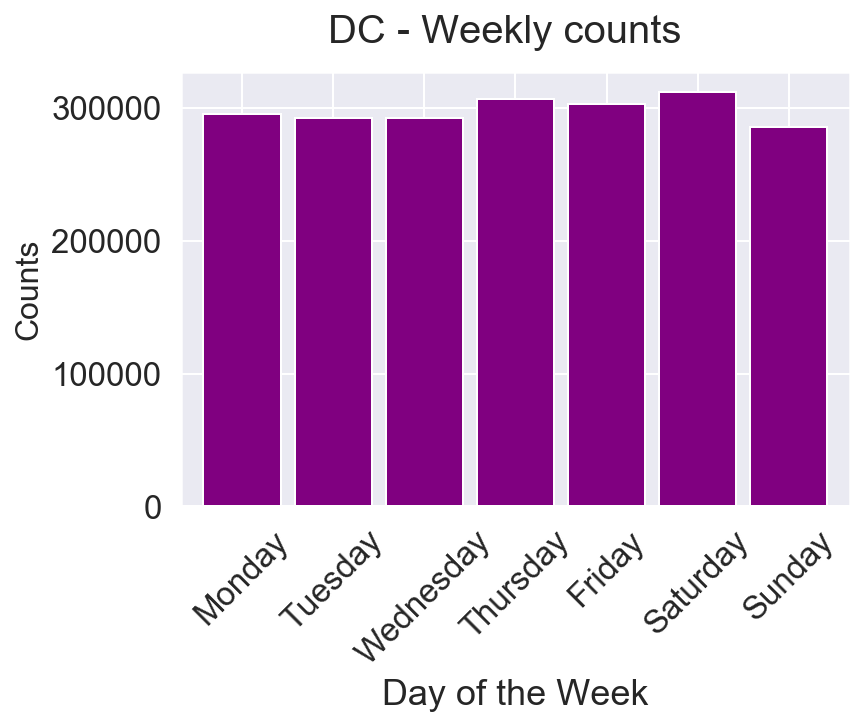

In [48]:
fig = plt.figure()
DC.groupby('Day')['count'].sum().plot(
    kind='bar', color='purple', width=0.85)
fig.suptitle('DC - Weekly counts', fontsize=20)
plt.xlabel('Day of the Week', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Counts', fontsize=16)

# Canada:

In [ ]:
canada.head()

In [ ]:
canada.shape

In [ ]:
canada.dropna(inplace=True)

In [ ]:
replace_to_days = []

for day_index in canada.day_of_week:
    replace_to_days.append(days_of_the_week[(int(day_index) - 1) % 7])

canada['Day'] = replace_to_days
canada.Day.value_counts()  

In [ ]:
canada['Day'] = canada['Day'].astype(CategoricalDtype(categories=days_of_the_week, ordered=True))
canada.groupby('Day')['count'].mean().plot(
    kind='bar', color='r', width=0.85)
plt.xticks(rotation=45)
plt.show()

In [ ]:
median_of_mean_temp_canada = canada.MeanTemp.median()

In [ ]:
list_temp_can = []
for i in canada['MeanTemp']:
    if i > median_of_mean_temp_canada:
        list_temp_can.append(1)
    else:
        list_temp_can.append(0)
canada['MeanTemp_binary'] =  list_temp_can

In [ ]:
aver_temp_can = canada.groupby(['Day','MeanTemp_binary']).sum()/canada.groupby(['Day','MeanTemp_binary']).count()


In [ ]:
aver_temp_can['count'].plot(
    kind='bar', width=0.85)
plt.xticks(rotation=45)
plt.show()

In [ ]:
mean_rain_canada = canada.TotalRainmm.mean()

In [ ]:
list_rain_can = []
for i in canada['TotalRainmm']:
    if i > median_of_mean_temp_canada:
        list_rain_can.append(1)
    else:
        list_rain_can.append(0)
canada['Rain_binary'] =  list_rain_can

In [ ]:
aver_rain_can = canada.groupby(['Day','Rain_binary']).sum()/canada.groupby(['Day','Rain_binary']).count()